# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


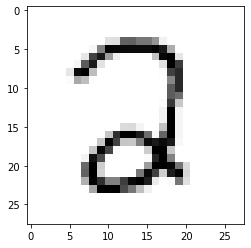

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23728264747530328
train accuracy is: 0.6505591720914705, test accuracy is 0.6612903225806451


Epoch 10 Loss 0.11878698780958961
train accuracy is: 0.900934735436488, test accuracy is 0.9032258064516129


Epoch 20 Loss 0.06787655551094195
train accuracy is: 0.9316474712068102, test accuracy is 0.9349798387096774


Epoch 30 Loss 0.05133335139790525
train accuracy is: 0.9441662493740611, test accuracy is 0.954133064516129


Epoch 40 Loss 0.04350864184459978
train accuracy is: 0.9520113503588716, test accuracy is 0.9591733870967742


Epoch 50 Loss 0.038848088320246464
train accuracy is: 0.9550993156401268, test accuracy is 0.9637096774193549


Epoch 60 Loss 0.03569183934064982
train accuracy is: 0.9588549490903021, test accuracy is 0.9647177419354839


Epoch 70 Loss 0.03334415038247984
train accuracy is: 0.9610248706392923, test accuracy is 0.967741935483871


Epoch 80 Loss 0.03150884980225969
train accuracy is: 0.9625271240193624, test accuracy is 0.9692540322580645


Epoch 90 Loss 0.03001903630650364
train accuracy is: 0.9641128359205475, test accuracy is 0.9712701612903226


Epoch 100 Loss 0.028766872576129855
train accuracy is: 0.9657820063428476, test accuracy is 0.9712701612903226


Epoch 110 Loss 0.02768908433969778
train accuracy is: 0.9670338841595727, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.026750113640846757
train accuracy is: 0.9677850108496078, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.025907968979412964
train accuracy is: 0.9692038057085628, test accuracy is 0.9727822580645161


Epoch 140 Loss 0.025145380573739193
train accuracy is: 0.9697880153563679, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.024443858736262144
train accuracy is: 0.970872976130863, test accuracy is 0.9737903225806451


Epoch 160 Loss 0.023803049557815075
train accuracy is: 0.9722083124687031, test accuracy is 0.9742943548387096


Epoch 170 Loss 0.023207653328692714
train accuracy is: 0.9733767317643132, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.022654762770801053
train accuracy is: 0.9739609414121182, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.02213387282188859
train accuracy is: 0.9748789851443832, test accuracy is 0.9732862903225806


Epoch 200 Loss 0.021635388870536437
train accuracy is: 0.9755466533133033, test accuracy is 0.9727822580645161


Epoch 210 Loss 0.02116739732585009
train accuracy is: 0.9757135703555333, test accuracy is 0.9727822580645161


Epoch 220 Loss 0.02072725308897367
train accuracy is: 0.9761308629611083, test accuracy is 0.9727822580645161


Epoch 230 Loss 0.02030739860694788
train accuracy is: 0.9762977800033383, test accuracy is 0.9732862903225806


Epoch 240 Loss 0.019915732474013653
train accuracy is: 0.9769654481722584, test accuracy is 0.9727822580645161


0.030877122504913448

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2355952330548922
train accuracy is: 0.6965448172258387, test accuracy is 0.7268145161290323


Epoch 10 Loss 0.1061061564622853
train accuracy is: 0.8983475212819229, test accuracy is 0.9112903225806451


Epoch 20 Loss 0.08180117617267395
train accuracy is: 0.9207978634618594, test accuracy is 0.9334677419354839


Epoch 30 Loss 0.07017737542293859
train accuracy is: 0.9318143882490403, test accuracy is 0.9460685483870968


Epoch 40 Loss 0.06309849306354177
train accuracy is: 0.9391587381071608, test accuracy is 0.9511088709677419


Epoch 50 Loss 0.05826836638650967
train accuracy is: 0.943748956768486, test accuracy is 0.952116935483871


Epoch 60 Loss 0.054732957525707594
train accuracy is: 0.9465030879652813, test accuracy is 0.9556451612903226


Epoch 70 Loss 0.05201381099781753
train accuracy is: 0.9485060924720414, test accuracy is 0.9571572580645161


Epoch 80 Loss 0.04984462479481707
train accuracy is: 0.9500083458521115, test accuracy is 0.9591733870967742


Epoch 90 Loss 0.04806564139195031
train accuracy is: 0.9514271407110666, test accuracy is 0.9616935483870968


Epoch 100 Loss 0.046573066327655434
train accuracy is: 0.9524286429644466, test accuracy is 0.9616935483870968


Epoch 110 Loss 0.045297669117759065
train accuracy is: 0.9536805207811717, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04419288224465289
train accuracy is: 0.9545985645134368, test accuracy is 0.9621975806451613


Epoch 130 Loss 0.04322257290696337
train accuracy is: 0.9561842764146219, test accuracy is 0.9632056451612904


Epoch 140 Loss 0.04236180522582484
train accuracy is: 0.956851944583542, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.04159212740705065
train accuracy is: 0.956851944583542, test accuracy is 0.9632056451612904


Epoch 160 Loss 0.040897583671632015
train accuracy is: 0.957269237189117, test accuracy is 0.9642137096774194


Epoch 170 Loss 0.04026640688052951
train accuracy is: 0.958020363879152, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.039689292213805856
train accuracy is: 0.958604573526957, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.03915999661221759
train accuracy is: 0.9590218661325322, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.03867135959018948
train accuracy is: 0.9596060757803372, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.038217806111121994
train accuracy is: 0.9597729928225672, test accuracy is 0.9652217741935484


Epoch 220 Loss 0.03779684472624632
train accuracy is: 0.9602737439492572, test accuracy is 0.9652217741935484


Epoch 230 Loss 0.03740293801561793
train accuracy is: 0.9604406609914873, test accuracy is 0.9652217741935484


Epoch 240 Loss 0.037034397950007056
train accuracy is: 0.9606075780337172, test accuracy is 0.9652217741935484


0.050851226691805376

### Comparing results of NN and LR

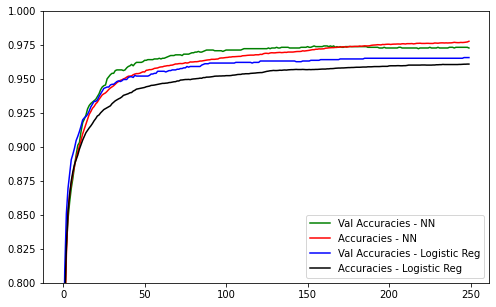

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

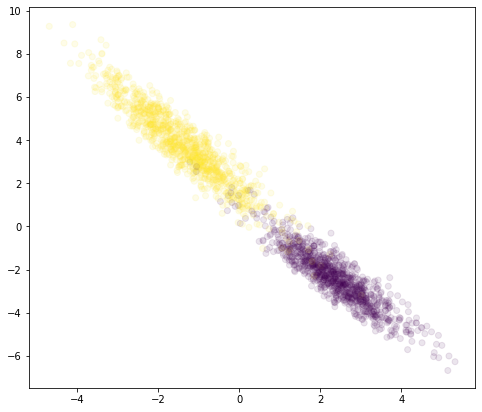

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

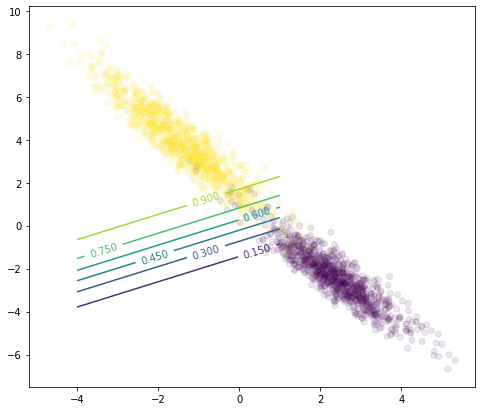

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );